In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('ProjectSample/IRIS.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df=data.copy()

## Data Cleaning

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species


## Feature Engineering/PREPROCESSING DATA


In [8]:
## Map species to numerical values
df['species']=df['species'].astype('category').cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


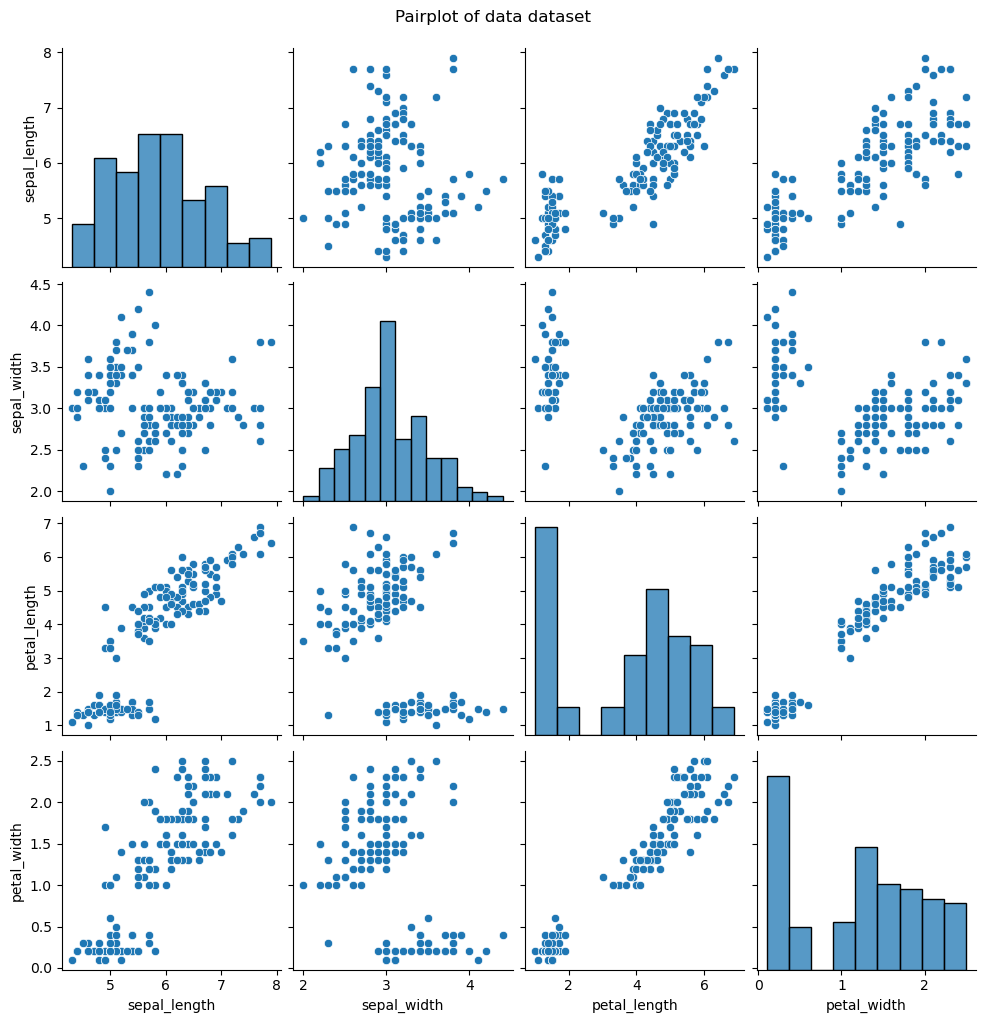

In [14]:
sns.pairplot(data)
plt.suptitle('Pairplot of data dataset', y=1.02)
plt.show()

In [9]:
corr=df.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


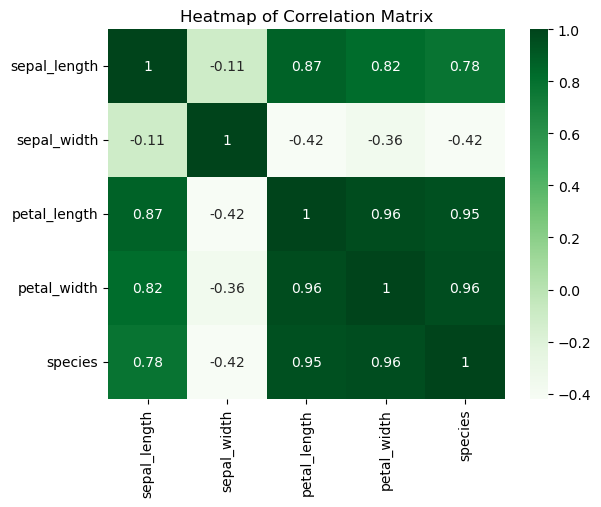

In [10]:
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Heatmap of Correlation Matrix')
plt.show()

## Modelling   


## Train Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split

## Features and target variable
x=df.drop('species', axis=1)
y=df['species']

##  split the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [12]:
## import the LogisticRegression class from sklearn
from sklearn.linear_model import LogisticRegression

## initialize the Logistic Regression model
logistic_model=LogisticRegression()

## fit the model to the training data(x_train and y_train)
logistic_model.fit(x_train, y_train)

LogisticRegression()

## Validating Logistic Regression

In [13]:
## predict the target variable for the test data(x_test)
y_pred_logistic=logistic_model.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.9333333333333333


In [15]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [16]:
x=df[['sepal_length', 'petal_length', 'petal_width']]
y=df['species']
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [17]:
## initialize the Logistic Regression model
logistic_model=LogisticRegression()

## fit the model to the training data(x_train and y_train)
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [18]:
from sklearn.metrics import accuracy_score

print('Logistic Regression Results:')
print('Accuracy:', accuracy_score(y_test, y_pred_logistic))

Logistic Regression Results:
Accuracy: 0.9333333333333333


In [19]:
y_pred_logistic

array([2, 1, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 2,
       1], dtype=int8)

In [25]:
y_test

127    2
53     1
140    2
19     0
106    2
12     0
78     1
31     0
83     1
9      0
26     0
98     1
146    2
69     1
136    2
68     1
18     0
71     1
126    2
30     0
29     0
107    2
38     0
120    2
57     1
22     0
66     1
135    2
84     1
11     0
137    2
47     0
121    2
27     0
4      0
129    2
131    2
148    2
44     0
16     0
10     0
117    2
87     1
141    2
58     1
Name: species, dtype: int8

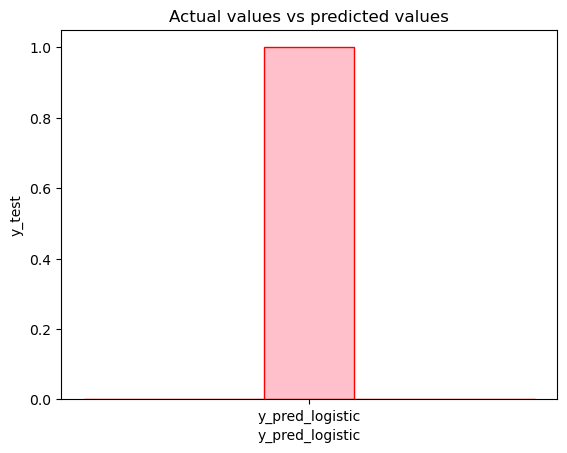

In [27]:
plt.hist(['y_pred_logistic'], bins=5, color='pink', edgecolor='red')
plt.title('Actual values vs predicted values')
plt.xlabel('y_pred_logistic')
plt.ylabel('y_test')
plt.show()

In [30]:
sns.boxplot(x='y_test', y='y_pred_logistic',
           hue='Type', palette=['green','yellow'])
plt.title('Actual values vs predicted values')
plt.show()

ValueError: Could not interpret value `y_test` for `x`. Value is a string, but `data` was not passed.

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

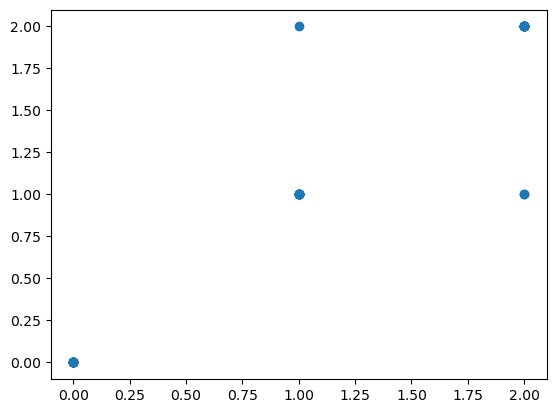

In [32]:
plt.scatter(y_test,y_pred_logistic)
plt.xlable('y_test')
plt.ylable('y_pred_logistic')
plt.show()

## Train Random Forest Model

In [33]:
from sklearn.model_selection import train_test_split

## Features and target variable
x=df.drop('species', axis=1)
y=df['species']

##  split the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.3, random_state=42)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train, y_train)

RandomForestClassifier()

## Validating RM

In [35]:
rm_pred=rm.predict(x_test)

In [36]:
rm_accuracy=accuracy_score(y_test, rm_pred)
rm_accuracy

0.9555555555555556

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:

kn_pred=kn.predict(x_test)


In [39]:
kn_accuracy=accuracy_score(y_test, kn_pred)
kn_accuracy

0.9555555555555556

In [40]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train, y_train)

SVC()

In [41]:
svm_pred=svm.predict(x_test)

In [42]:
svm_accuracy=accuracy_score(y_test, svm_pred)
svm_accuracy

0.9555555555555556